### Loading Packages

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import math

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### Fetching and Converting the Data to a DataFrame

In [2]:
rome = pd.read_csv('/Users/jyots/Desktop/DS_Projects/airbnb_datasets/Airbnb listings in Rome (August 2015).csv',
                   encoding='utf8')

In [3]:
rome.head(2)

,Unnamed: 0,room_id,host_id,room_type,city,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,0,1318,1482,Entire home/apt,NaN,VI Municipio,17,5.0,2.0,2.0,1.0,66.0,5.0,41.876495,12.543356,2015-08-29 19:26:35.020747
1,1,1650,1822,Private room,NaN,XVII Municipio,108,4.5,3.0,1.0,0.5,75.0,1.0,41.917495,12.460583,2015-08-29 19:26:35.020747


### Dropping the additional 'city' column 

In [4]:
rome.drop('city', axis=1, inplace=True)

In [5]:
rome.neighborhood.unique()

array([u'VI Municipio', u'XVII Municipio', u'XVI Municipio',
       u'I Municipio', u'XI Municipio', u'II Municipio',
       u'XVIII Municipio', u'XV Municipio', u'X Municipio',
       u'XIX Municipio', u'III Municipio', u'IX Municipio',
       u'XII Municipio', u'VII Municipio', u'IV Municipio', u'V Municipio',
       u'XX Municipio', u'XIII Municipio'], dtype=object)

In [6]:
rome.room_type.isnull().sum()

0

In [7]:
rome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15703 entries, 0 to 15702
Data columns (total 15 columns):
Unnamed: 0              15703 non-null int64
room_id                 15703 non-null int64
host_id                 15703 non-null int64
room_type               15703 non-null object
neighborhood            15703 non-null object
reviews                 15703 non-null int64
overall_satisfaction    10656 non-null float64
accommodates            12861 non-null float64
bedrooms                15670 non-null float64
bathrooms               15537 non-null float64
price                   15703 non-null float64
minstay                 14320 non-null float64
latitude                15703 non-null float64
longitude               15703 non-null float64
collected               15703 non-null object
dtypes: float64(8), int64(4), object(3)
memory usage: 1.8+ MB


In [8]:
rome.bedrooms.isnull().sum()

33

In [9]:
rome.bedrooms.unique()

array([  2.,   1.,   3.,   0.,   4.,  nan,   5.,   8.,   6.,   7.,   9.])

In [10]:
rome = rome[rome['bedrooms'].notnull()]

In [11]:
rome.bathrooms[rome.bathrooms==0].value_counts()

0.0    61
Name: bathrooms, dtype: int64

In [12]:
# We have removed the rows that had "0" bathrooms. We are assuming every house comes with atleast 1 bathroom.
rome = rome[rome['bathrooms'] != 0.]

In [13]:
rome.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15609 entries, 0 to 15702
Data columns (total 15 columns):
Unnamed: 0              15609 non-null int64
room_id                 15609 non-null int64
host_id                 15609 non-null int64
room_type               15609 non-null object
neighborhood            15609 non-null object
reviews                 15609 non-null int64
overall_satisfaction    10596 non-null float64
accommodates            12775 non-null float64
bedrooms                15609 non-null float64
bathrooms               15444 non-null float64
price                   15609 non-null float64
minstay                 14232 non-null float64
latitude                15609 non-null float64
longitude               15609 non-null float64
collected               15609 non-null object
dtypes: float64(8), int64(4), object(3)
memory usage: 1.9+ MB


### Imputation for bathrooms

In [14]:
rome.sort_values('bedrooms', inplace=True)

In [15]:
rome = rome.reset_index()

In [16]:
rome.head(2)

,index,Unnamed: 0,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,12829,12829,6408911,5056483,Entire home/apt,I Municipio,0,NaN,2.0,0.0,1.0,167.0,3.0,41.890418,12.469850,2015-08-30 03:34:51.607302
1,14097,14097,7072260,17215980,Entire home/apt,VII Municipio,2,4.5,4.0,0.0,1.0,52.0,2.0,41.891317,12.561203,2015-08-29 22:16:46.220345


In [17]:
rome.drop(['index','Unnamed: 0'], axis=1, inplace=True)

In [18]:
rome.head(2)

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,6408911,5056483,Entire home/apt,I Municipio,0,NaN,2.0,0.0,1.0,167.0,3.0,41.890418,12.469850,2015-08-30 03:34:51.607302
1,7072260,17215980,Entire home/apt,VII Municipio,2,4.5,4.0,0.0,1.0,52.0,2.0,41.891317,12.561203,2015-08-29 22:16:46.220345


In [19]:
# Imputation for Bathrooms
rome.bathrooms.fillna(method='bfill',inplace=True)


### Imputation for overall_score

In [20]:
rome['overall_satisfaction'].isnull().sum()

5013

In [21]:
# maximum number of reviews for a place where satisfaction level is null is 6(very small), we impute the 
# satisfaction level with a score of 2.
rome['reviews'][rome['overall_satisfaction'].isnull()].value_counts()

0    4886
1     116
2       9
3       1
4       1
Name: reviews, dtype: int64

In [22]:
# Imputation for overall satisfaction
rome.overall_satisfaction.fillna(value =2. ,inplace=True)


### Replacing the neighborhood names to easily readable and sortable names. 
On investigation, I found that the municipalities were reorganized in 2013 and the count of municipalities
was reduced from 19 to 15. So the repeated municipality names indicate that 2 municipalities were merged and were given a common name.For example, "XVII Municipio" is "I Municipio" now and I renamed it Municipio 1 now.

In [23]:
rome.neighborhood.replace('I Municipio','Municipio 1', inplace=True)
rome.neighborhood.replace('II Municipio','Municipio 2', inplace=True)
rome.neighborhood.replace('III Municipio','Municipio 2', inplace=True)
rome.neighborhood.replace('IV Municipio','Municipio 3', inplace=True)
rome.neighborhood.replace('V Municipio','Municipio 4', inplace=True)
rome.neighborhood.replace('VI Municipio','Municipio 5', inplace=True)
rome.neighborhood.replace('VII Municipio','Municipio 5', inplace=True)
rome.neighborhood.replace('IX Municipio','Municipio 7', inplace=True)
rome.neighborhood.replace('X Municipio','Municipio 7', inplace=True)
rome.neighborhood.replace('XI Municipio','Municipio 8', inplace=True)
rome.neighborhood.replace('XII Municipio','Municipio 9', inplace=True)
rome.neighborhood.replace('XIII Municipio','Municipio 10', inplace=True)
rome.neighborhood.replace('XV Municipio','Municipio 11', inplace=True)
rome.neighborhood.replace('XVI Municipio','Municipio 12', inplace=True)
rome.neighborhood.replace('XVIII Municipio','Municipio 13', inplace=True)
rome.neighborhood.replace('XIX Municipio','Municipio 14', inplace=True)
rome.neighborhood.replace('XX Municipio','Municipio 15', inplace=True)
rome.neighborhood.replace('XVII Municipio','Municipio 1', inplace=True)





In [24]:
rome.head(2)

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,6408911,5056483,Entire home/apt,Municipio 1,0,2.0,2.0,0.0,1.0,167.0,3.0,41.890418,12.469850,2015-08-30 03:34:51.607302
1,7072260,17215980,Entire home/apt,Municipio 5,2,4.5,4.0,0.0,1.0,52.0,2.0,41.891317,12.561203,2015-08-29 22:16:46.220345


### Imputation for minstay

In [25]:
rome['room_type'][rome['minstay'].isnull()].value_counts()

Entire home/apt    1114
Private room        262
Shared room           1
Name: room_type, dtype: int64

In [26]:
rome['minstay'] = rome.groupby('bedrooms').minstay.transform(lambda x: x.replace(np.nan, 2))


In [27]:
rome['bhk'] = rome.bedrooms.map(lambda x: 1. if x == 0. else x)

In [28]:
rome.head(2)

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected,bhk
0,6408911,5056483,Entire home/apt,Municipio 1,0,2.0,2.0,0.0,1.0,167.0,3.0,41.890418,12.469850,2015-08-30 03:34:51.607302,1.0
1,7072260,17215980,Entire home/apt,Municipio 5,2,4.5,4.0,0.0,1.0,52.0,2.0,41.891317,12.561203,2015-08-29 22:16:46.220345,1.0


### Converting and Saving the Clean Data to be Combined with the New Features Dataset

In [29]:
#rome.to_csv(path_or_buf='/Users/jyots/Desktop/DS_Projects/airbnb_datasets/Rome_Clean.csv')

### Trends across neighborhoods

In [30]:
custom = lambda x: np.average(x)
df1 = pd.DataFrame(rome.groupby('neighborhood').agg({'host_id':'count','reviews':'sum', 'price':custom}))

In [31]:
df1=df1.reset_index()

In [32]:
df1.sort_values('neighborhood', inplace = True)

In [33]:
df1 = df1.reset_index()

In [34]:
df1.head(2)

,index,neighborhood,reviews,host_id,price
0,0,Municipio 1,140078,8989,132.265547
1,1,Municipio 10,1,1,67.000000


### Bar Plot for Avg Price Per Neighborhood

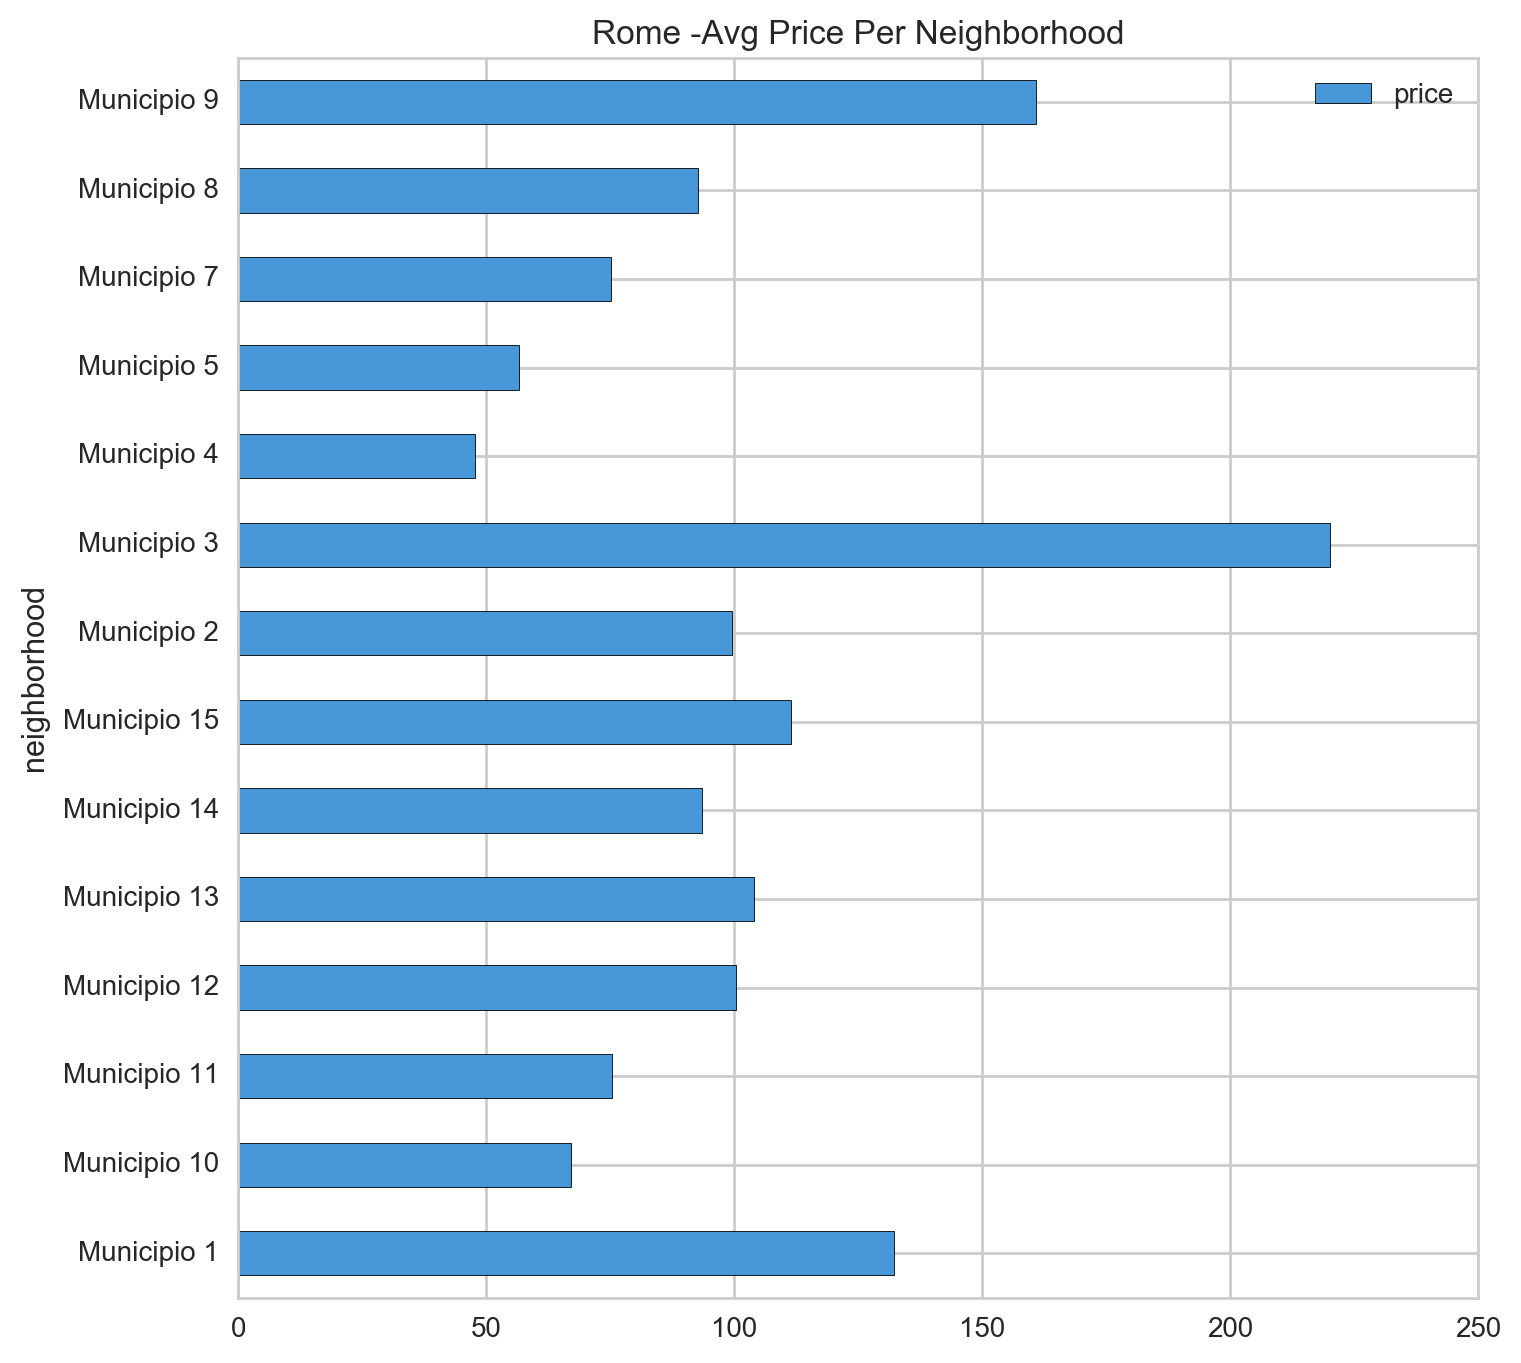

In [35]:
df1.plot(x='neighborhood', y='price', figsize=(8,8), kind = 'barh', title = 'Rome -Avg Price Per Neighborhood',
         color = '#4897D8'
        )

### Bar Plot for Total Listings Per Neighborhood


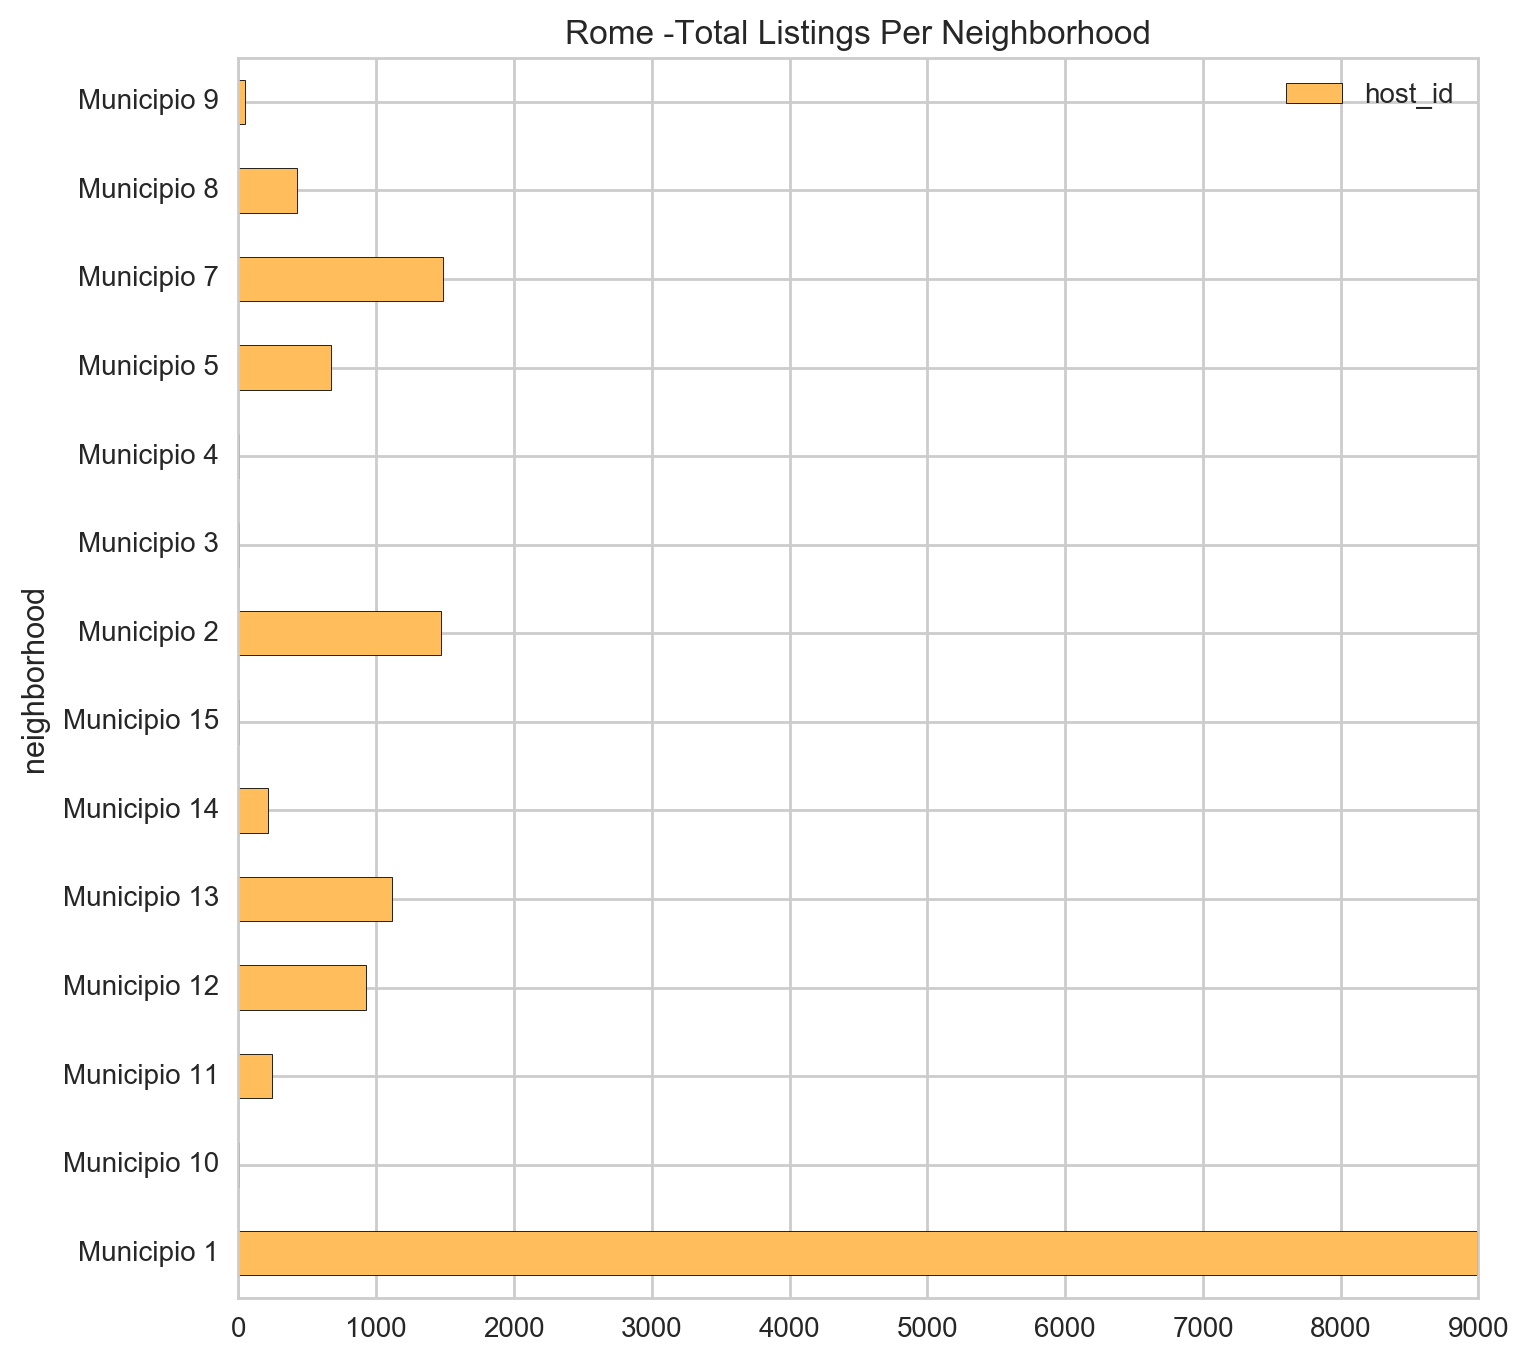

In [36]:
df1.plot(x='neighborhood', y='host_id', figsize=(8,8), kind = 'barh',title = 'Rome -Total Listings Per Neighborhood',
         color = '#FFBD5C')

### Bar Plot for Total Reviews Per Neighborhood


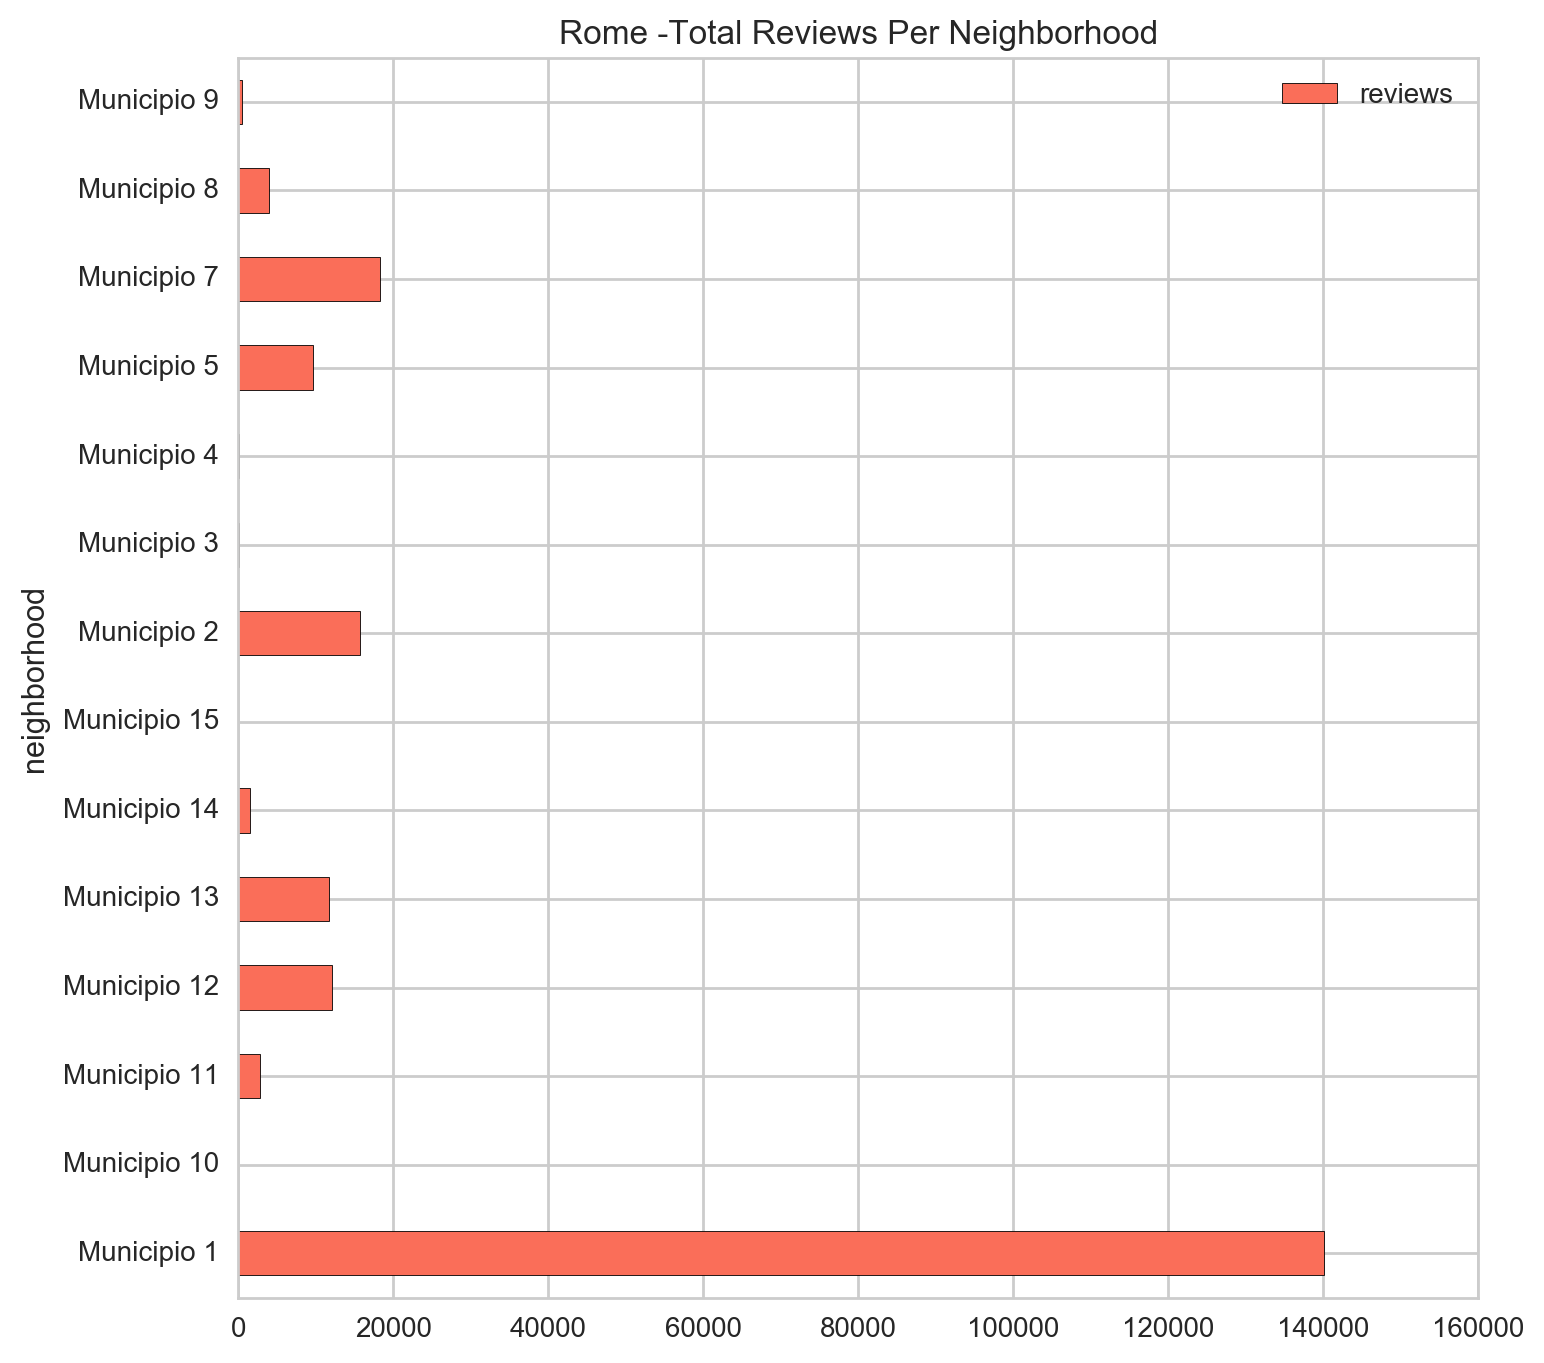

In [37]:
df1.plot(x='neighborhood', y='reviews', figsize=(8,8), kind = 'barh',title = 'Rome -Total Reviews Per Neighborhood',
        color='#FA6E59')

In [38]:
custom = lambda x: np.average(x)
df2 = pd.DataFrame(rome.groupby(['neighborhood','room_type']).agg({'host_id':'count','reviews':'sum', 'price':custom}))

In [39]:
df2.reset_index(level=0, inplace=True)
df2.reset_index(inplace=True)

In [40]:
df2.head(2)
df2['scaled_reviews'] = df2.reviews.map(lambda x:x/1000)

### Price  Vs Review Count Variation Across Neighborhoods Based on Room-Type


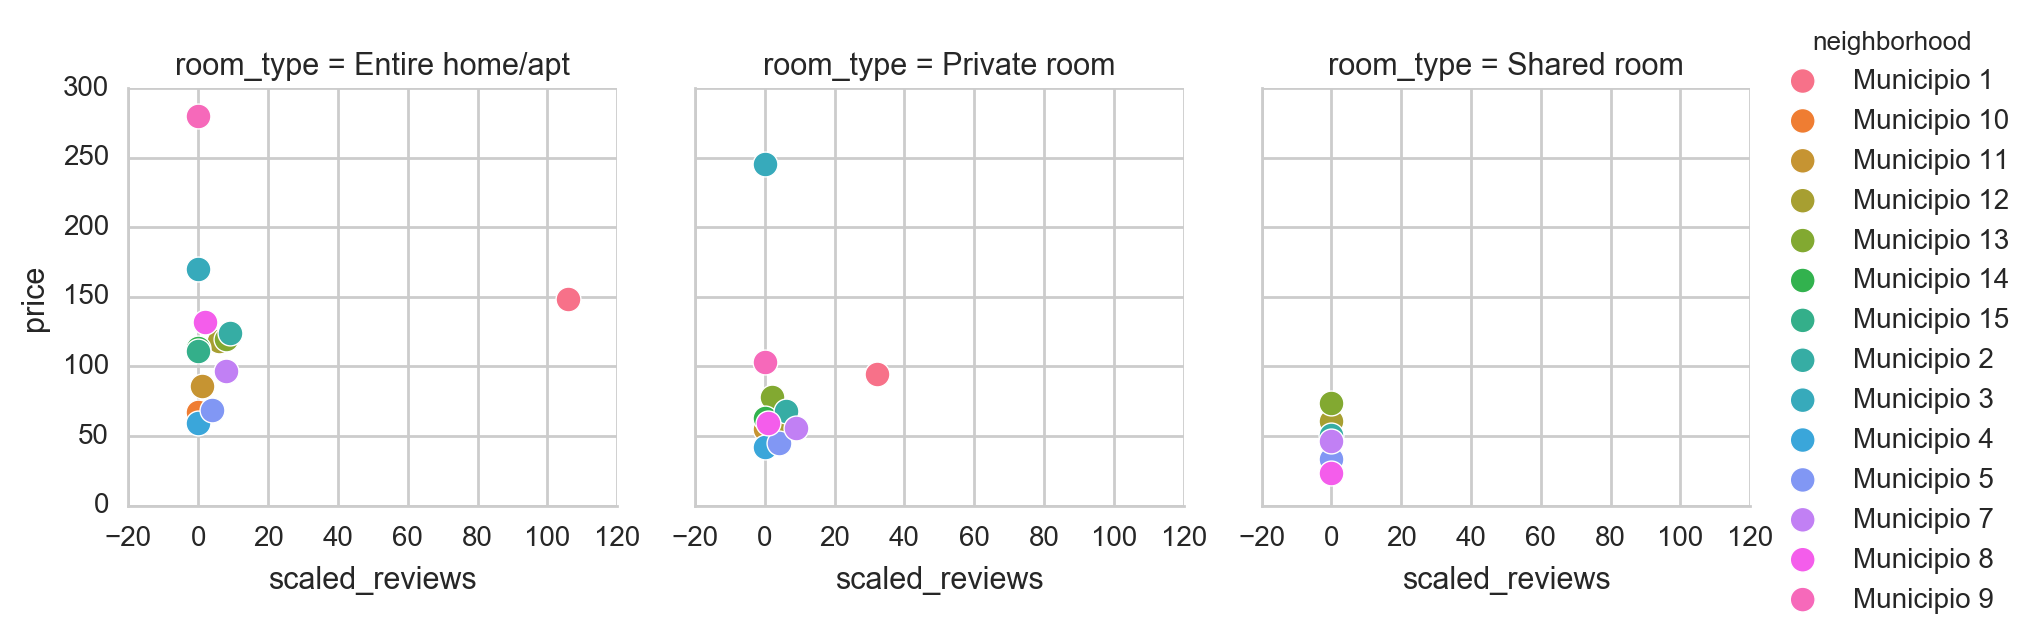

In [41]:

kws = dict(s=80, linewidth=.5)
g = sns.FacetGrid(df2, col="room_type", hue='neighborhood',size=3,)
g = (g.map(plt.scatter,"scaled_reviews","price", edgecolor="w", **kws).add_legend())



In [42]:
custom = lambda x: np.average(x)
df3 = pd.DataFrame(rome.groupby(['neighborhood','room_type','bedrooms']).agg({'bedrooms':'count','price':custom}))

In [43]:
df3.rename(columns={'bedrooms':'bedroom_count'}, inplace=True)

In [44]:
df3.reset_index(inplace=True)

In [45]:
df3.head(2)

,neighborhood,room_type,bedrooms,price,bedroom_count
0,Municipio 1,Entire home/apt,0.0,104.016304,368
1,Municipio 1,Entire home/apt,1.0,121.233250,2791


### Price  Vs Bedrooms Variation Across Neighborhoods Based on Room-Type


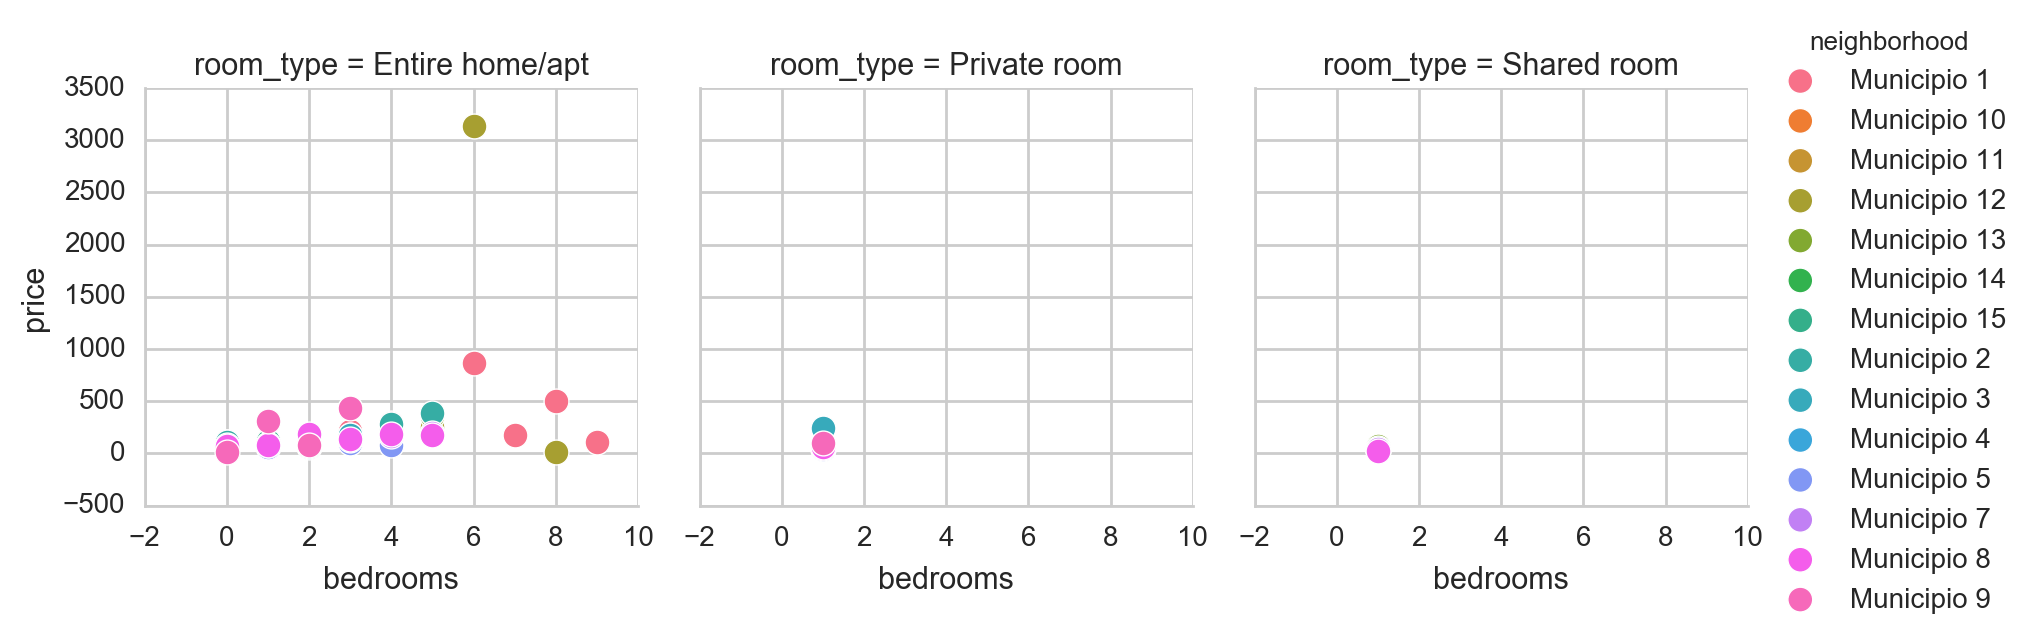

In [46]:
kws = dict(s=80, linewidth=.5)
g = sns.FacetGrid(df3, col="room_type", hue='neighborhood',size=3,)
g = (g.map(plt.scatter,"bedrooms","price", edgecolor="w", **kws).add_legend())

### Correlation Between Features

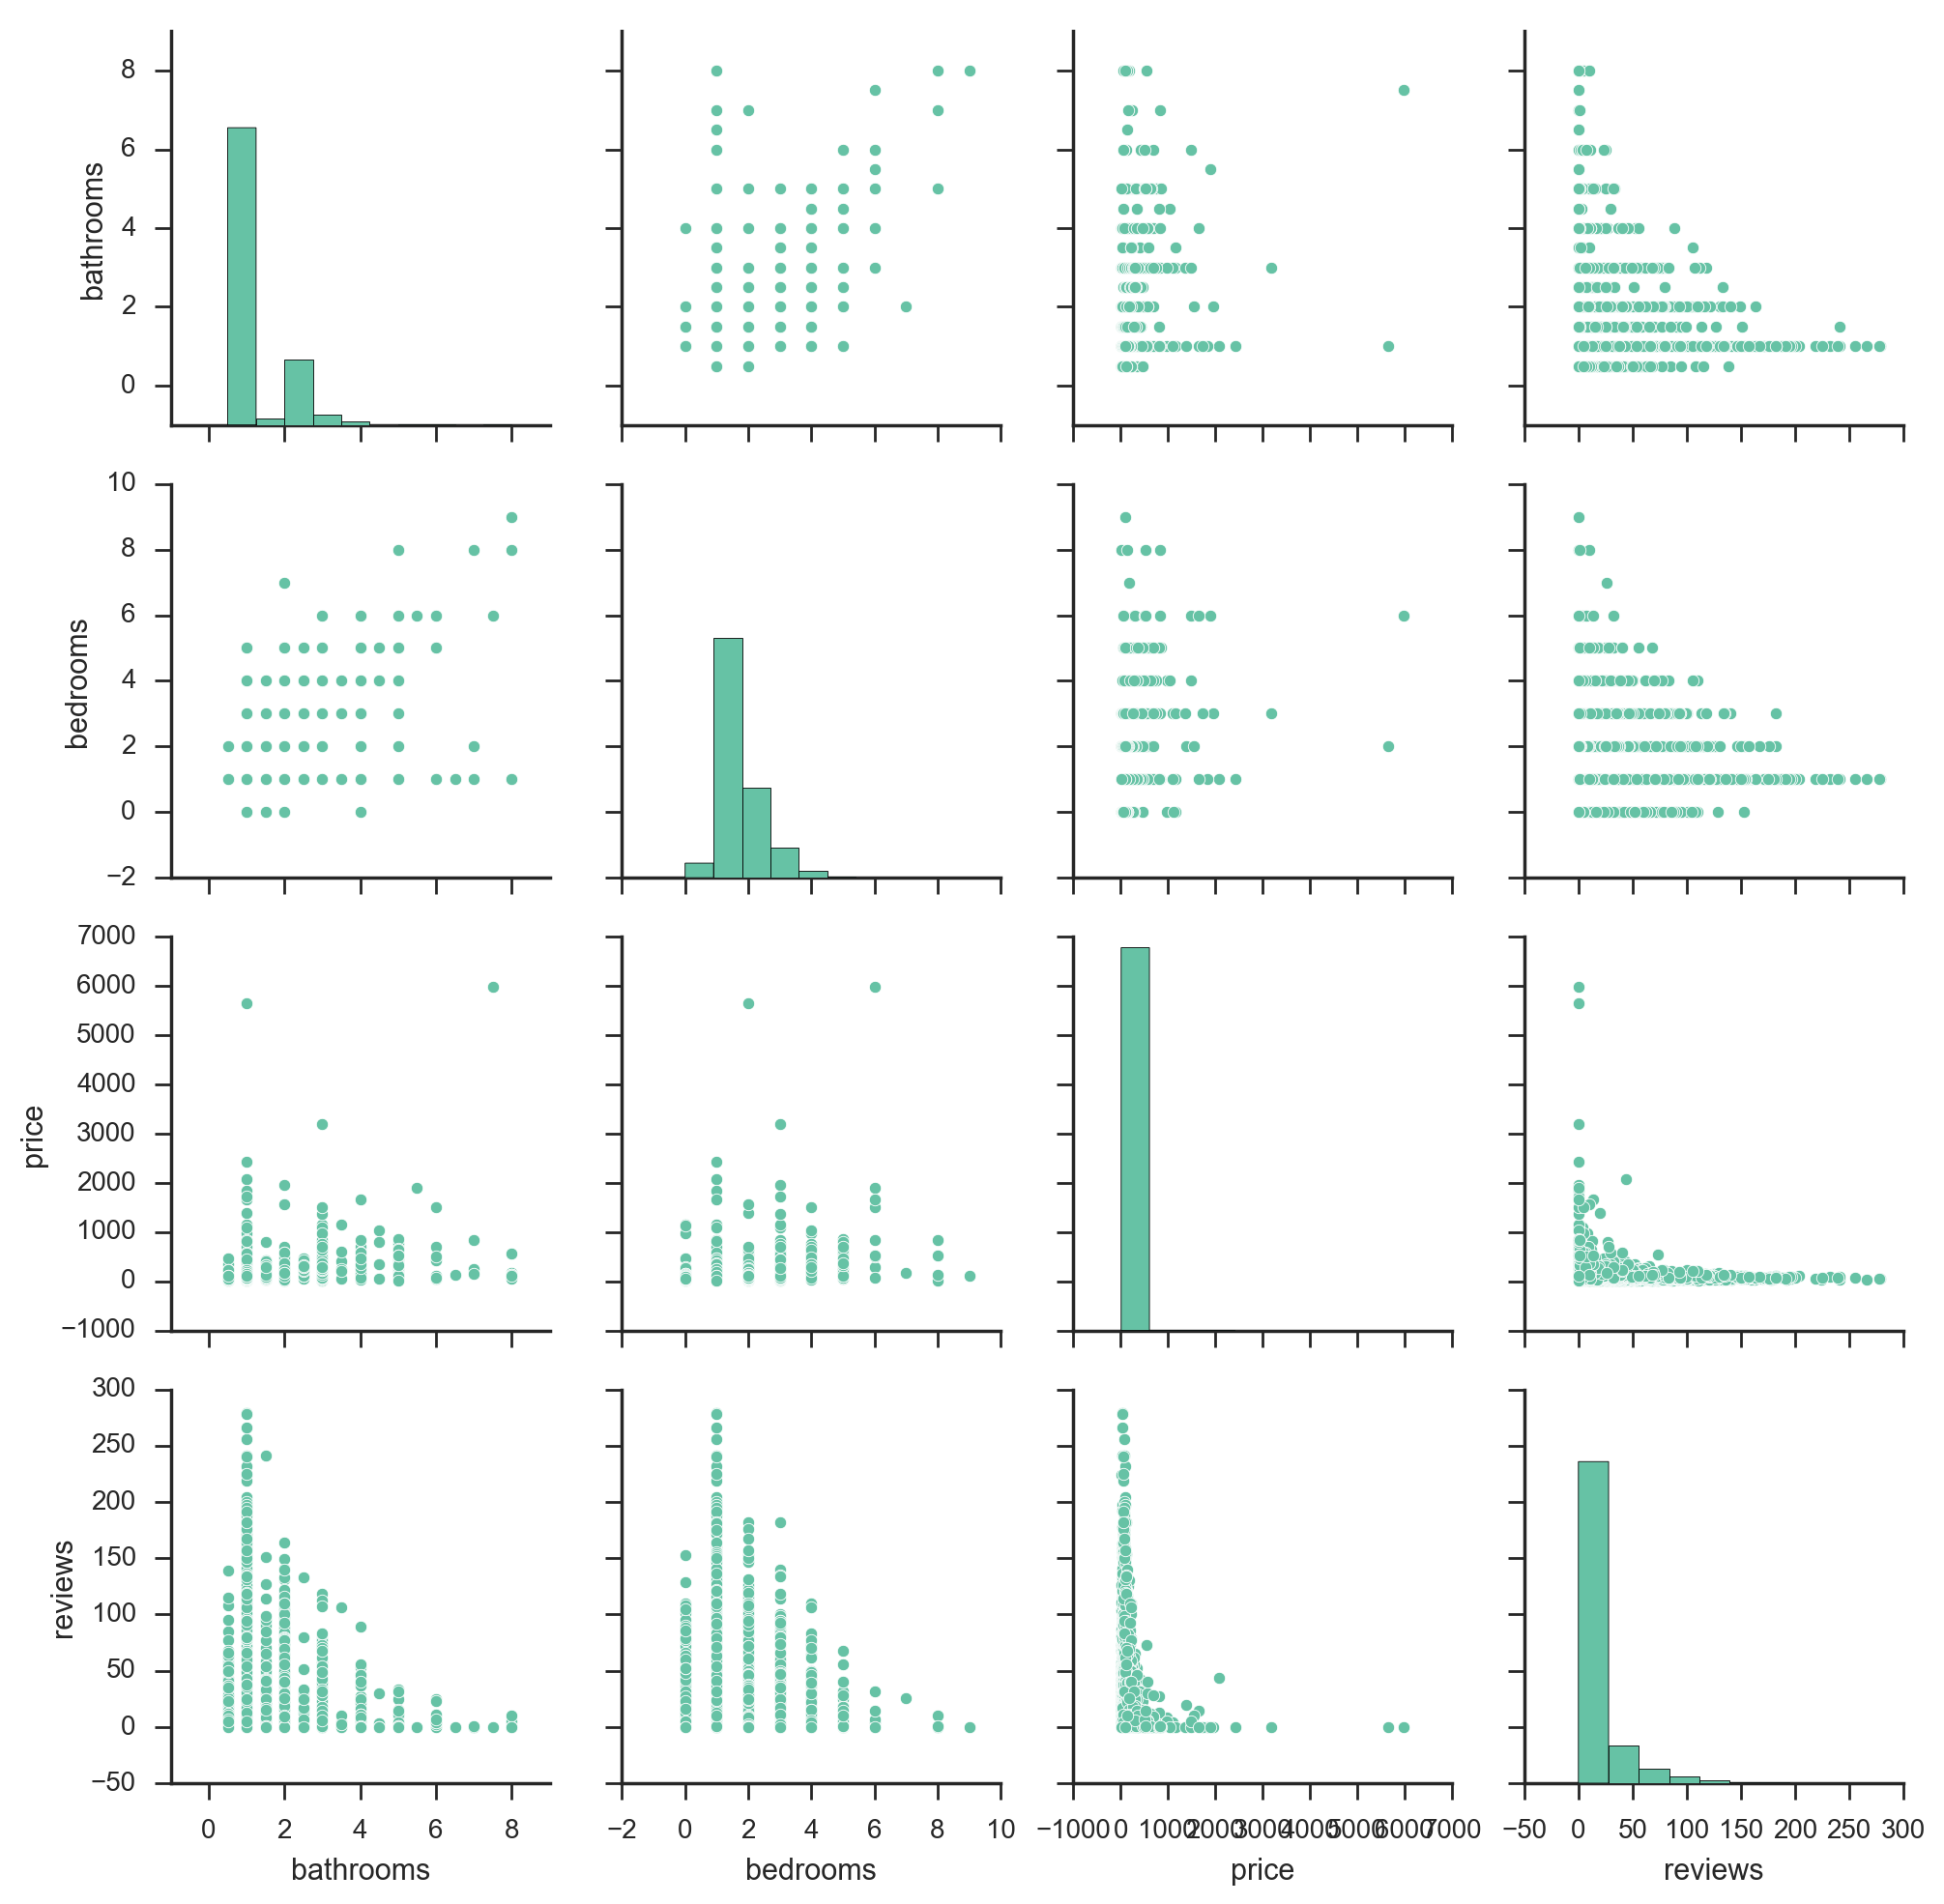

In [47]:
sns.set(style="ticks", color_codes= False, palette ='Set2' )

sns.pairplot(rome[['neighborhood','room_type','bathrooms','bedrooms','price','reviews']], hue=None,
             hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter',
             diag_kind='hist', markers=None, size=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None,
             grid_kws=None)

### Heatmap Showing the Corrlation Between Numerical Features

In [48]:
df4_corr = rome[['neighborhood','room_type','bathrooms','bedrooms','price','reviews']].corr()

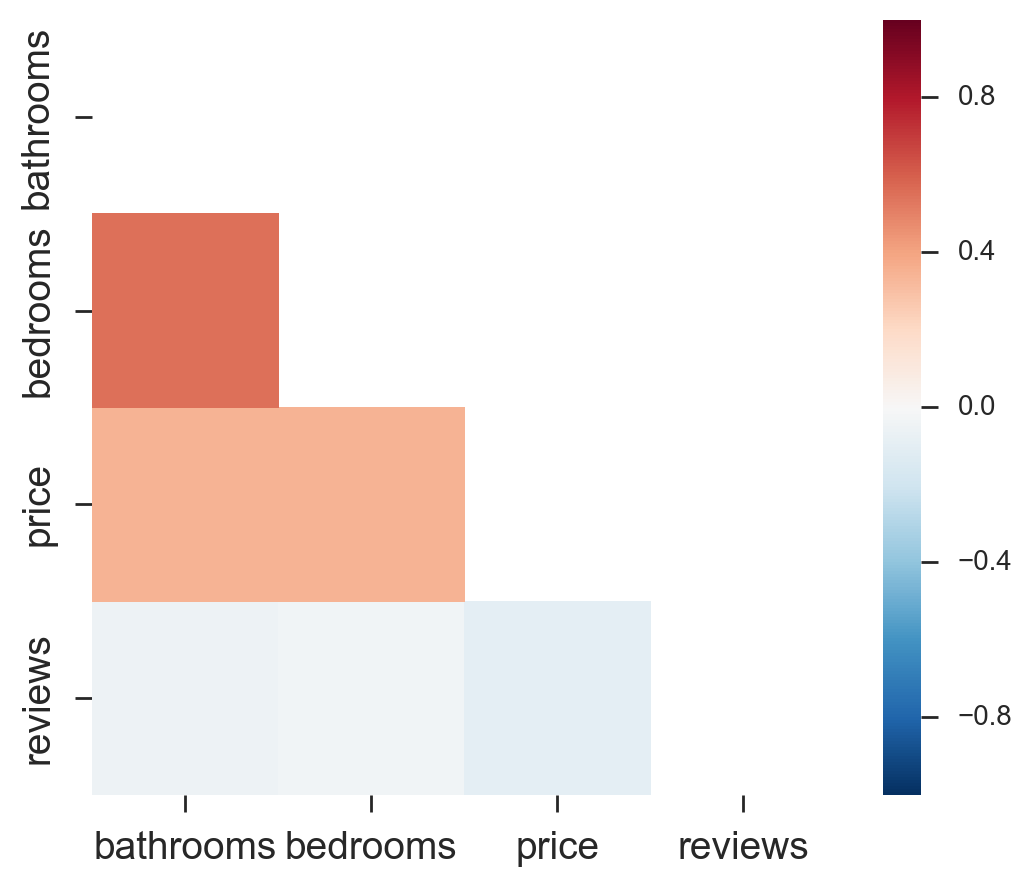

In [49]:
#for heatmap Set the default matplotlib figure size to 7x7:

plt.rcParams['figure.figsize']=(6,5)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df4_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(df4_corr, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

### BoxPlot for Price Variation Against Bathroom Count Per Listing


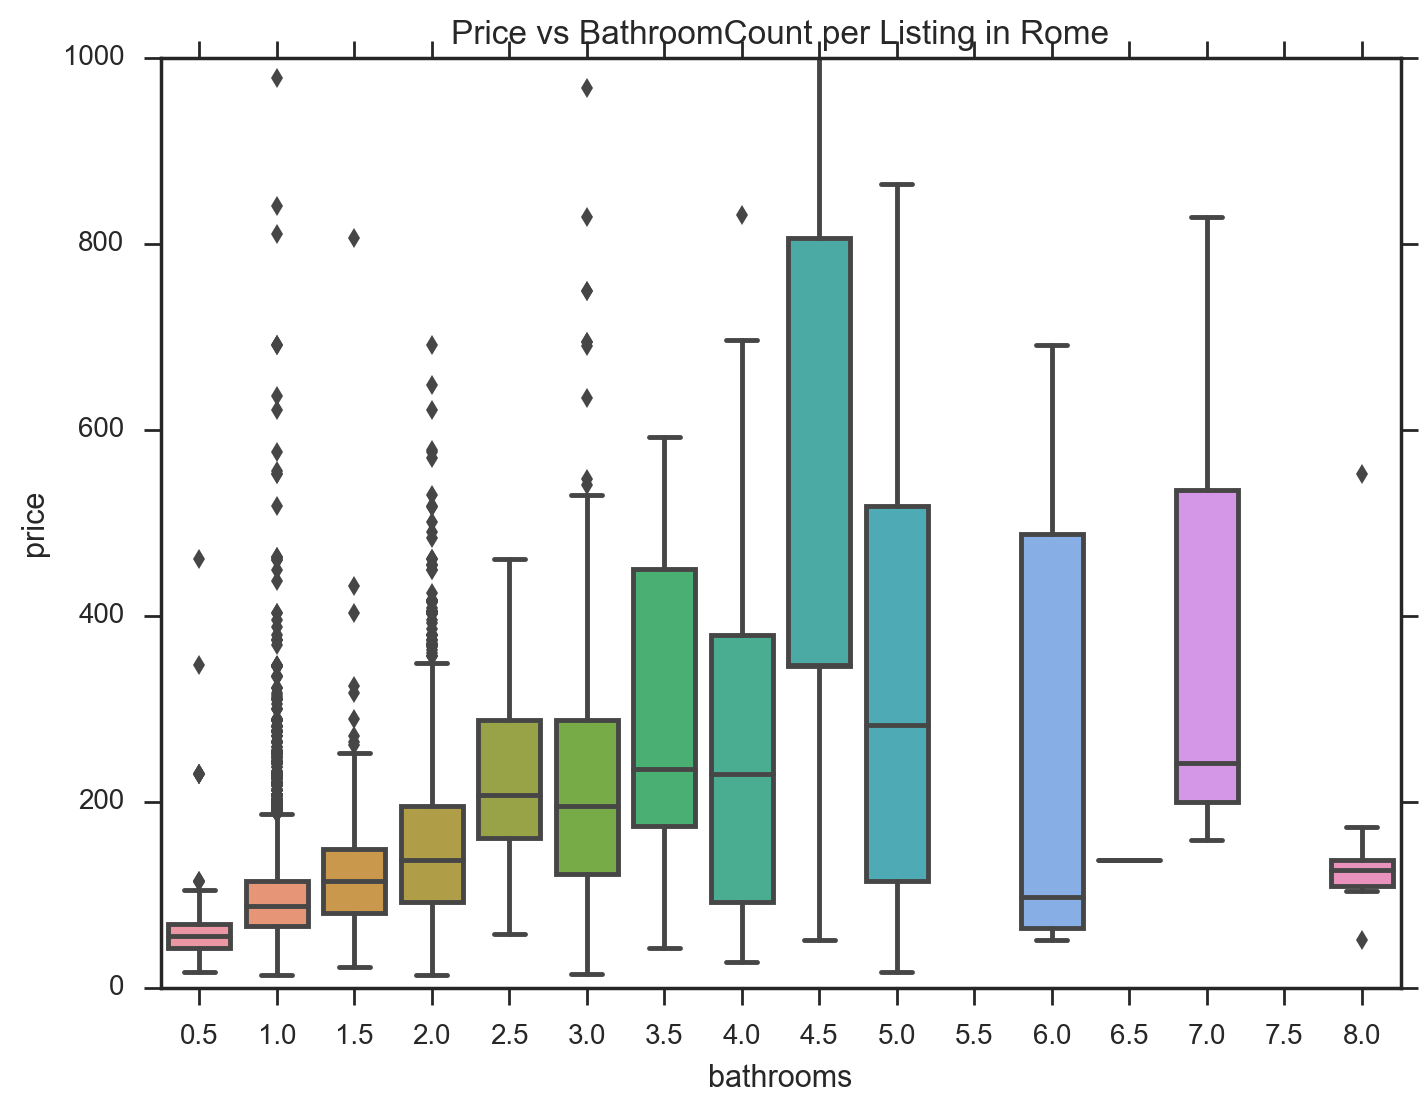

In [50]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

sns.boxplot(x='bathrooms',y='price',data=rome)

ax.set_ylim([0,1000])
ax.set_title("Price vs BathroomCount per Listing in Rome")



### BoxPlot for Price Variation Against Bedroom Count Per Listing


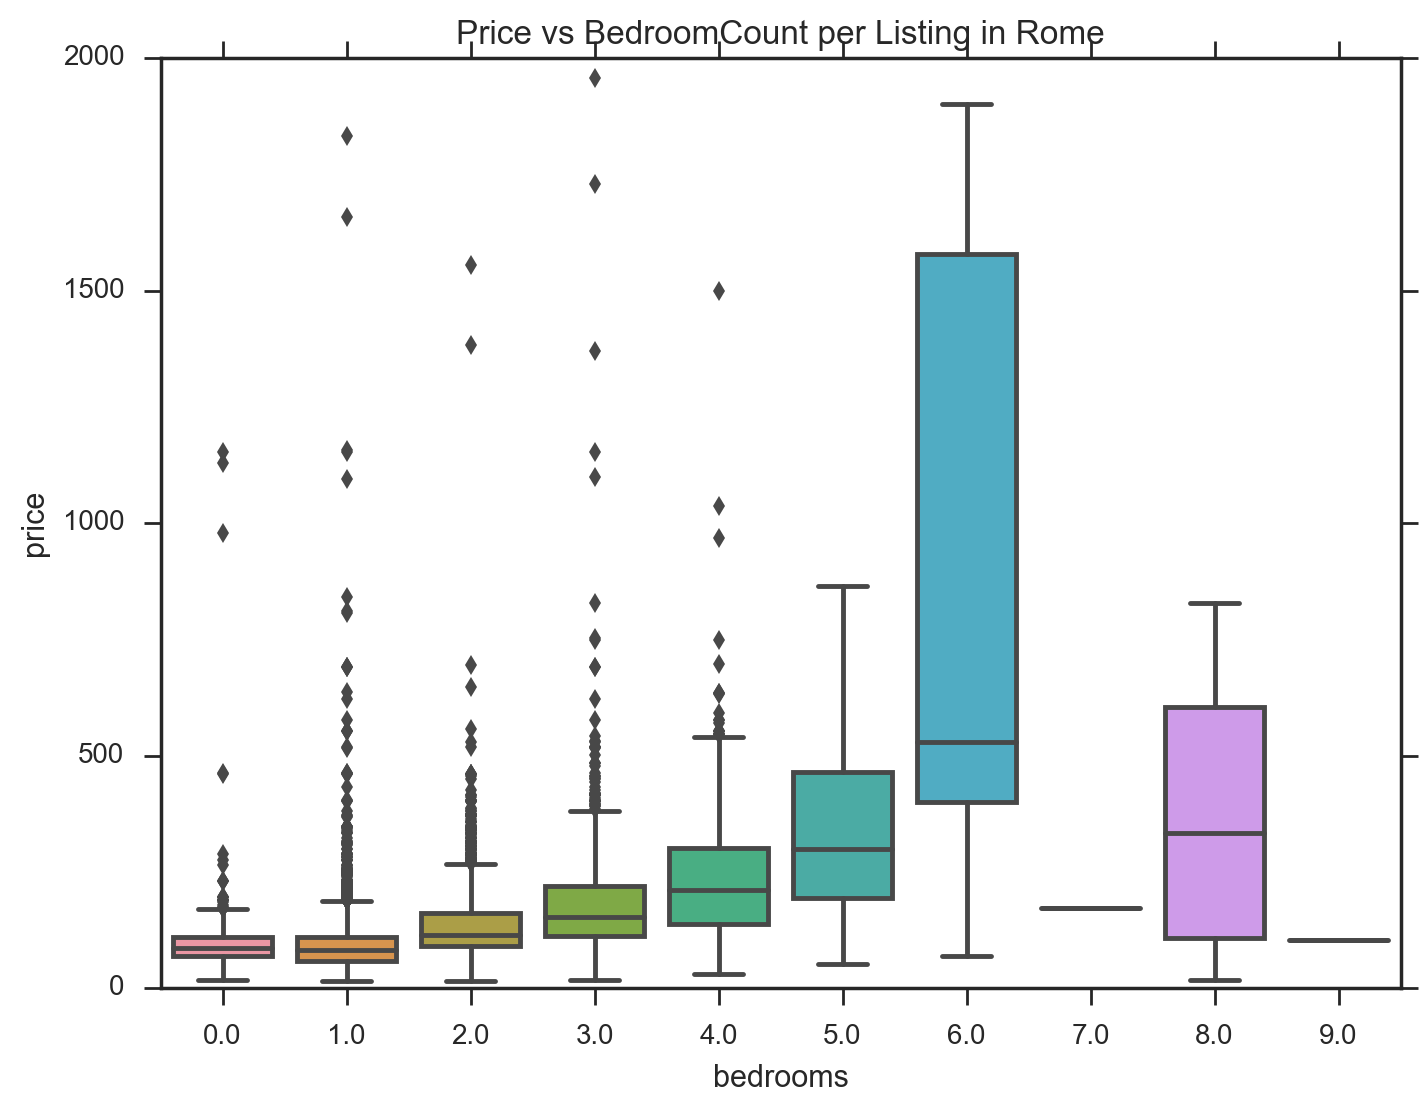

In [51]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

sns.boxplot(x='bedrooms',y='price',data=rome)

ax.set_ylim([0,2000])
ax.set_title("Price vs BedroomCount per Listing in Rome")





### Scatter Plot  for Price Variation Against Review Count Per Listing


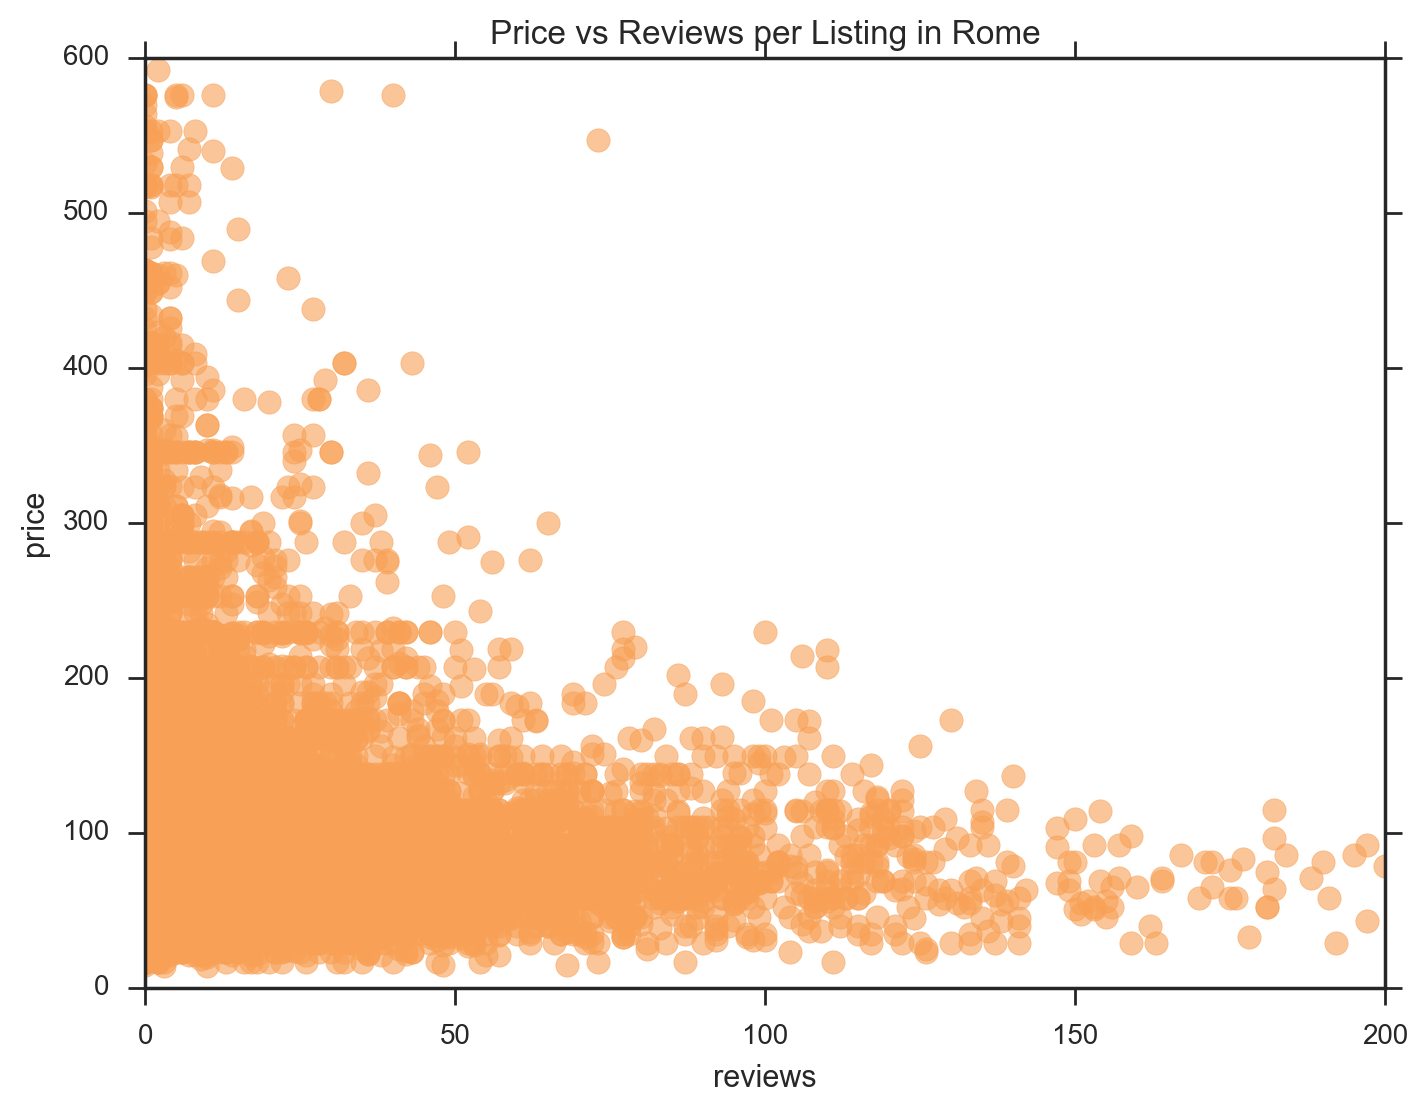

In [52]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

ax.scatter(x= rome.reviews ,y= rome.price, s=70, alpha=0.6, c='#F8A055', edgecolors='#F8A055')
ax.set_ylim([0,600])
ax.set_xlim([0,200])

ax.set_ylabel("price")
ax.set_xlabel("reviews")

ax.set_title("Price vs Reviews per Listing in Rome")